In [1]:
import numpy as np
from scipy.special import gamma, perm
import matplotlib.pyplot as plt

### Define Functions

$Beta(\mu)={\Gamma(a+b) \over {\Gamma(a)\Gamma(b)}}\mu^{a-1}(1-\mu)^{b-1}$

$Bin(m|N,\mu)=\left(\begin{array}{l}N \\m\end{array}\right) \mu^m (1-\mu)^{N-m}$, $m, N$이 주어지고, $\mu$에 대한 함수임에 주의!!!

In [2]:
# Prior Distribution
def Beta(mu, a, b):
    # mu : domain value
    # a, b : parameters
    return gamma(a+b) / (gamma(a)*gamma(b)) * mu**(a-1) * (1-mu)**(b-1)

# As Likelihood Function, Note that likelihood function is not a probability distribution
def Binormial(mu, m, N):
    # mu : domain value
    # m : # of heads(success)
    # N : # of trials
    
    return perm(N, m) * (mu**m) * (1-mu)**(N-m)

### Sample domain values and get prior, likehood & posterior

In [3]:
# Sample 100 domain values from range (0, 1) uniformly.
X = np.linspace(0, 1, 100)

# Set a prior and a likelihood function.
prior = Beta(X, 2, 2)
likelihood = Binormial(X, 1, 1)

# Find the normalized posterior by multiplying the prior and the likelihood
unnormed_posterior = prior * likelihood

# Find the normalized posterior
normed_posterior = Beta(X, 3, 2)

### Plot prior, likelihood & posterior.

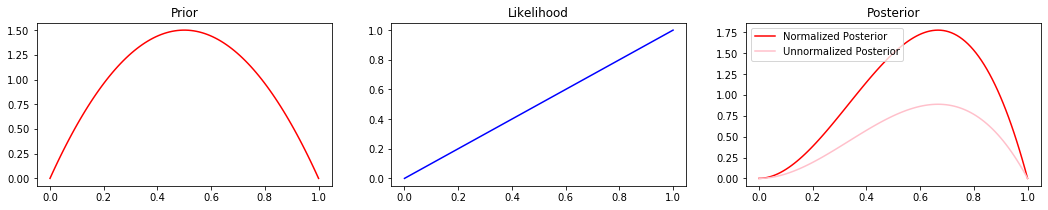

In [4]:
plt.figure(figsize=[18, 3])
plt.subplot(1, 3, 1)
plt.title('Prior')
plt.plot(X, prior, color='red')

plt.subplot(1, 3, 2)
plt.title('Likelihood')
plt.plot(X, likelihood, color='blue')

plt.subplot(1, 3, 3)
plt.title('Posterior')
plt.plot(X, normed_posterior, color='red', label='Normalized Posterior')
plt.plot(X, unnormed_posterior, color='pink', label='Unnormalized Posterior')
plt.legend()
plt.show()